<a href="https://colab.research.google.com/github/robertoherraiz/Practicas_PS/blob/main/FFT_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

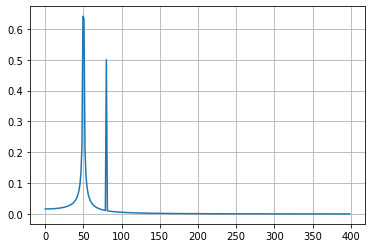

In [7]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

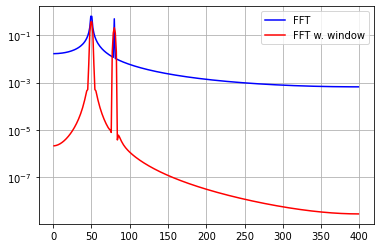

In [4]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()


In [8]:
from scipy.fft import fftfreq
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [10]:
from scipy.fft import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

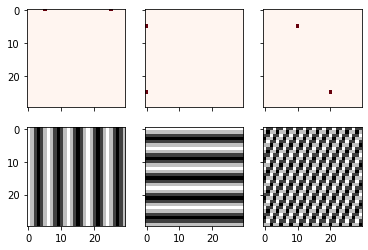

In [5]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

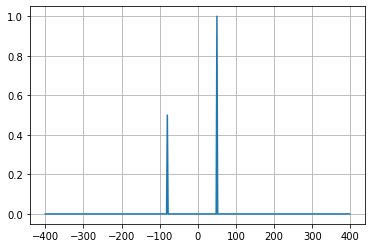

In [11]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [12]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N, endpoint=False)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

0.0009872817275276098

0.06196643004256714

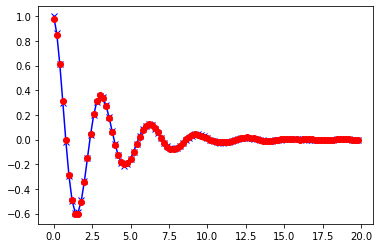

In [13]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

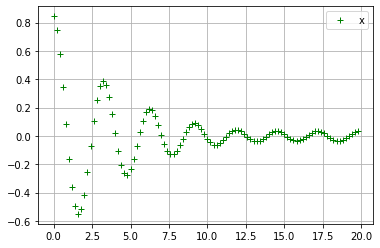

In [14]:
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()